<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Maximum_Points_in_an_Archery_Competition_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Points in an Archery Competition

Alice and Bob are opponents in an archery competition. The competition has set the following rules:

- Alice first shoots numArrows arrows and then Bob shoots numArrows arrows.
- The points are then calculated as follows:
 - The target has integer scoring sections ranging from 0 to 11 inclusive.
 - For each section of the target with score k (in between 0 to 11), say Alice and Bob have shot ak and bk arrows on that section respectively. If ak >= bk, then Alice takes k points. If ak < bk, then Bob takes k points.
 - However, if ak == bk == 0, then nobody takes k points.

For example, if Alice and Bob both shot 2 arrows on the section with score 11, then Alice takes 11 points. On the other hand, if Alice shot 0 arrows on the section with score 11 and Bob shot 2 arrows on that same section, then Bob takes 11 points.

You are given the integer numArrows and an integer array aliceArrows of size 12, which represents the number of arrows Alice shot on each scoring section from 0 to 11. Now, Bob wants to maximize the total number of points he can obtain.

Return the array bobArrows which represents the number of arrows Bob shot on each scoring section from 0 to 11. The sum of the values in bobArrows should equal numArrows.

If there are multiple ways for Bob to earn the maximum total points, return any one of them.

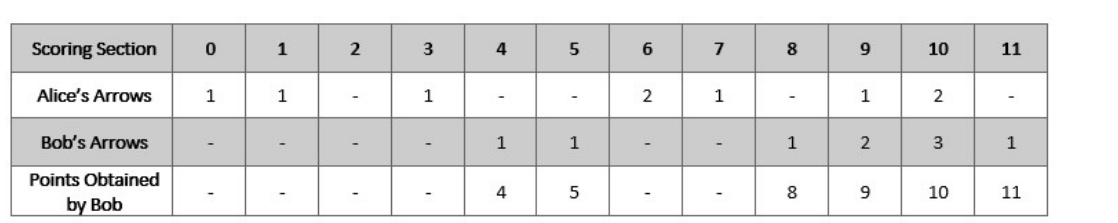

Example 1:

```
Input: numArrows = 9, aliceArrows = [1,1,0,1,0,0,2,1,0,1,2,0]
Output: [0,0,0,0,1,1,0,0,1,2,3,1]
Explanation: The table above shows how the competition is scored. 
Bob earns a total point of 4 + 5 + 8 + 9 + 10 + 11 = 47.
It can be shown that Bob cannot obtain a score higher than 47 points.
```



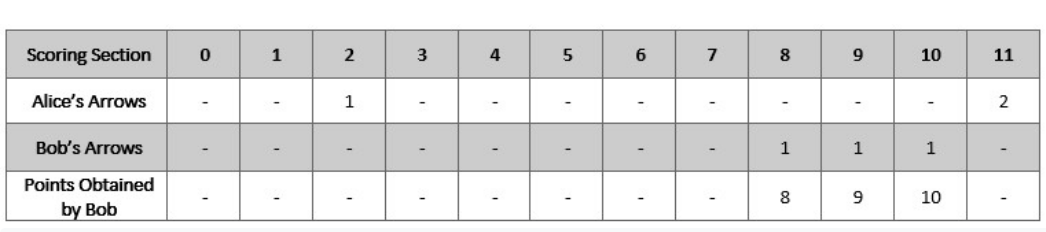

Example 2:

```
Input: numArrows = 3, aliceArrows = [0,0,1,0,0,0,0,0,0,0,0,2]
Output: [0,0,0,0,0,0,0,0,1,1,1,0]
Explanation: The table above shows how the competition is scored.
Bob earns a total point of 8 + 9 + 10 = 27.
It can be shown that Bob cannot obtain a score higher than 27 points.
```



Constraints:

```
1 <= numArrows <= 105
aliceArrows.length == bobArrows.length == 12
0 <= aliceArrows[i], bobArrows[i] <= numArrows
sum(aliceArrows[i]) == numArrows
```



# Solution

In [8]:
# Time = O(1)
# Space = O(1)

# because
# Time = O(2^S)
# Space = O(S)
# Where S = num of section = 12 (constant)

class Solution:
    def maximumBobPoints(self, numArrows, aliceArrows):
        bob_point, bob_win_section = dp(numArrows, len(aliceArrows) - 1, [], aliceArrows)

        bob_arrow = [0] * 12
        for idx in bob_win_section:
          bob_arrow[idx] = aliceArrows[idx] + 1
        
        bob_arrow[0] += numArrows - sum(bob_arrow)

        return bob_arrow

                
def dp(numArrows, idx, bob_win_section, aliceArrows):
    if numArrows < 0:
        return float("-inf"), bob_win_section
    if idx < 0:
        return 0, bob_win_section

    # bob lose
    bob_point1, bob_win_section1 = dp(numArrows, idx-1, bob_win_section, aliceArrows)

    # bob win
    bob_point2, bob_win_section2 = dp(numArrows - (aliceArrows[idx] + 1), idx - 1, bob_win_section + [idx], aliceArrows)
    bob_point2 += idx

    if bob_point1 > bob_point2:
        bob_point = bob_point1
        bob_win_section = bob_win_section1
    else:
        bob_point = bob_point2
        bob_win_section = bob_win_section2

    return bob_point, bob_win_section

In [3]:
numArrows = 9
aliceArrows = [1,1,0,1,0,0,2,1,0,1,2,0]
expected = [0,0,0,0,1,1,0,0,1,2,3,1]

output = Solution().maximumBobPoints(numArrows, aliceArrows)
print(output)
assert output == expected

[0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 3, 1]


In [4]:
numArrows = 3
aliceArrows = [0,0,1,0,0,0,0,0,0,0,0,2]
expected = [0,0,0,0,0,0,0,0,1,1,1,0]

output = Solution().maximumBobPoints(numArrows, aliceArrows)
print(output)
assert output == expected

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]


In [6]:
numArrows = 0
aliceArrows = [0,0,1,0,0,0,0,0,0,0,0,2]
expected = [0,0,0,0,0,0,0,0,0,0,0,0]

output = Solution().maximumBobPoints(numArrows, aliceArrows)
print(output)
assert output == expected

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
numArrows = 100000
aliceArrows = [0,0,1,0,0,0,0,0,0,0,0,2]
expected = [99986, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3]

output = Solution().maximumBobPoints(numArrows, aliceArrows)
print(output)
assert output == expected

[99986, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3]
